In [ ]:
!uv pip install pandas matplotlib seaborn networkx numpy skrub


Using Python 3.12.6 environment at: c:\Users\cestm\Downloads\projet_kg_wiki\.venv
Audited 6 packages in 63ms
Using Python 3.12.6 environment at: c:\Users\cestm\Downloads\projet_kg_wiki\.venv
Audited 1 package in 113ms


## In this EDA we will only focus on the chameleon data because it is the smallest. When the result will be satisfactory, we will generalise on all the 3 datasets

In [12]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import json 
import networkx as nx
from skrub import TableReport
edges = pd.read_csv('raw/wikipedia/chameleon/musae_chameleon_edges.csv')
target = pd.read_csv('raw/wikipedia/chameleon/musae_chameleon_target.csv')

with open("raw/wikipedia/chameleon/musae_chameleon_features.json", "r", encoding="utf-8") as f:
    feat_dict = json.load(f)

## Understanding of the datasets using skrub

In [16]:
report_edges = TableReport(edges)
report_target = TableReport(target)
report_edges

Processing column   2 / 2


<TableReport: use .open() to display>

In [17]:
report_target

Processing column   2 / 2


<TableReport: use .open() to display>

- density: 0.0121
- avg degree: 27.60


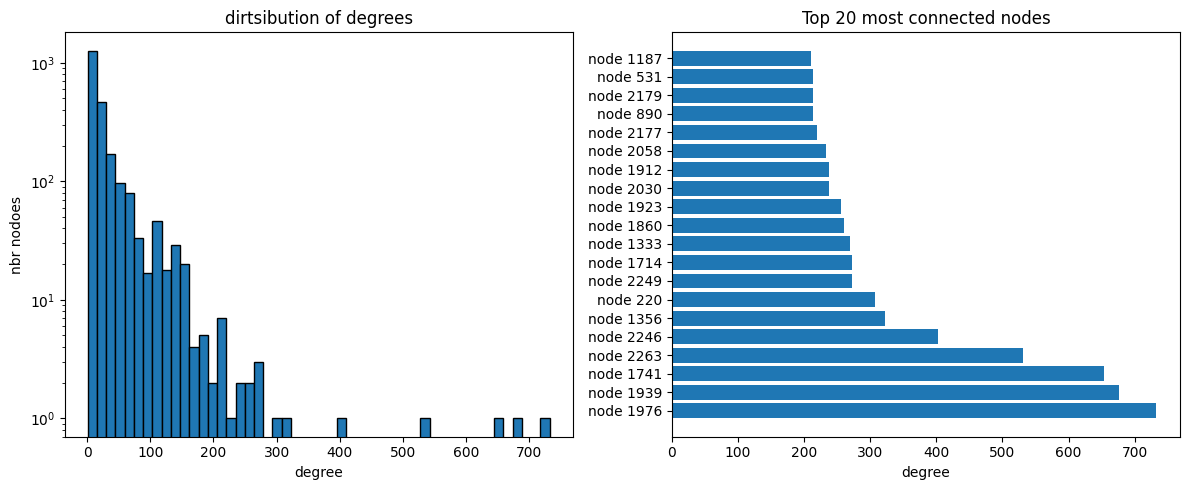

In [19]:
G = nx.from_pandas_edgelist(edges, 'id1', 'id2')

print(f"- density: {nx.density(G):.4f}")
print(f"- avg degree: {sum(dict(G.degree()).values()) / G.number_of_nodes():.2f}")


degrees = dict(G.degree())
degree_values = list(degrees.values())

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(degree_values, bins=50, edgecolor='black')
plt.xlabel('degree')
plt.ylabel('nbr nodoes')
plt.title('dirtsibution of degrees')
plt.yscale('log')

plt.subplot(1, 2, 2)
top_nodes = sorted(degrees.items(), key=lambda x: x[1], reverse=True)[:20]
nodes, counts = zip(*top_nodes)
plt.barh(range(len(nodes)), counts)
plt.yticks(range(len(nodes)), [f"node {n}" for n in nodes])
plt.xlabel('degree')
plt.title('Top 20 most connected nodes')
plt.tight_layout()
plt.show()


total nbr features: 2277
avg features/ node: 21.54
median: 16.00
Max features for one article: 96
Min features for one article: 4


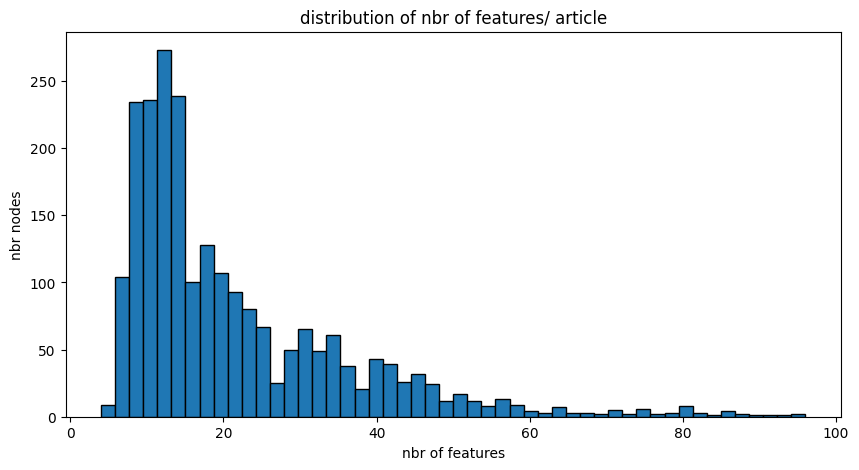

 Top 20 features frequency :
Feature 1794: 801 node (35.2%)
Feature 2753: 568 node (24.9%)
Feature 528: 423 node (18.6%)
Feature 598: 418 node (18.4%)
Feature 415: 399 node (17.5%)
Feature 2297: 376 node (16.5%)
Feature 735: 371 node (16.3%)
Feature 73: 365 node (16.0%)
Feature 2408: 356 node (15.6%)
Feature 2539: 329 node (14.4%)
Feature 1308: 228 node (10.0%)
Feature 584: 226 node (9.9%)
Feature 3047: 210 node (9.2%)
Feature 372: 205 node (9.0%)
Feature 165: 192 node (8.4%)
Feature 1073: 189 node (8.3%)
Feature 3118: 175 node (7.7%)
Feature 1057: 173 node (7.6%)
Feature 1001: 170 node (7.5%)
Feature 1505: 167 node (7.3%)


In [22]:

num_features_per_article = {k: len(v) for k, v in feat_dict.items()}

print(f"total nbr features: {len(feat_dict)}")
print(f"avg features/ node: {np.mean(list(num_features_per_article.values())):.2f}")
print(f"median: {np.median(list(num_features_per_article.values())):.2f}")
print(f"Max features for one article: {max(num_features_per_article.values())}")
print(f"Min features for one article: {min(num_features_per_article.values())}")


plt.figure(figsize=(10, 5))
plt.hist(list(num_features_per_article.values()), bins=50, edgecolor='black')
plt.xlabel('nbr of features')
plt.ylabel('nbr nodes')
plt.title('distribution of nbr of features/ article')
plt.show()

from collections import Counter
all_features = [f for features in feat_dict.values() for f in features]
feature_counts = Counter(all_features)

print(f" Top 20 features frequency :")
for feature, count in feature_counts.most_common(20):
    print(f"Feature {feature}: {count} node ({count/len(feat_dict)*100:.1f}%)")

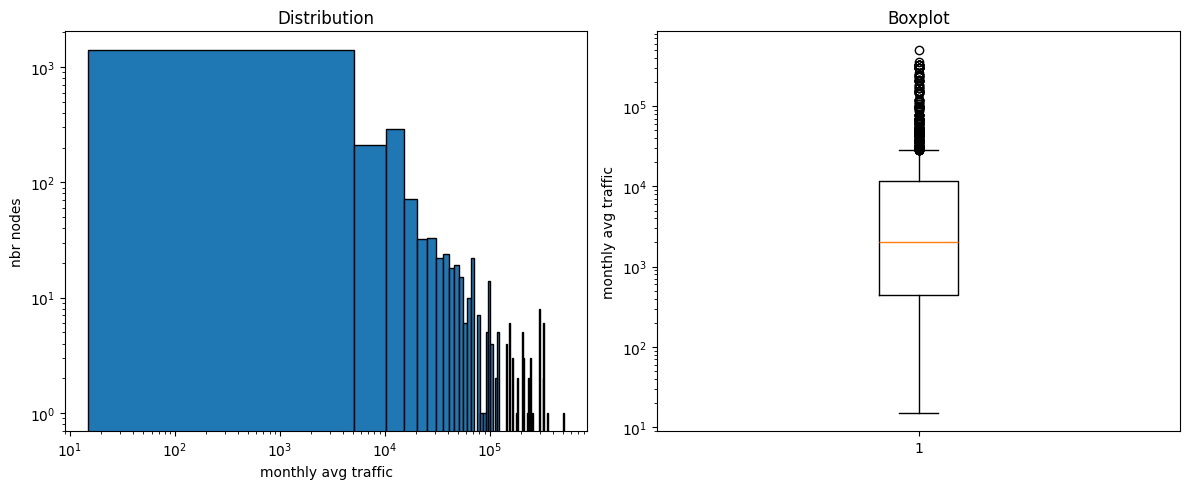

 Top 20 most visited nodes:
        id  target
1643  1643  508957
1708  1708  357739
105    105  329354
411    411  329354
447    447  329354
721    721  329354
1256  1256  329354
1911  1911  329354
83      83  321881
1092  1092  321881
36      36  298200
491    491  298200
121    121  296235
214    214  296235
386    386  296235
619    619  296235
927    927  296235
1923  1923  296235
427    427  256558
556    556  245091


In [25]:

plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.hist(target['target'], bins=100, edgecolor='black')
plt.xlabel('monthly avg traffic')
plt.ylabel('nbr nodes')
plt.title('Distribution')
plt.xscale('log')
plt.yscale('log')


plt.subplot(1, 2, 2)
plt.boxplot(target['target'])
plt.ylabel('monthly avg traffic')
plt.title('Boxplot')
plt.yscale('log')
plt.tight_layout()
plt.show()


top_traffic = target.nlargest(20, 'target')
print(" Top 20 most visited nodes:")
print(top_traffic)

Nbr community detected: 18
Avg size: 126 articles
largest: 1008 articles
smallest: 5 articles


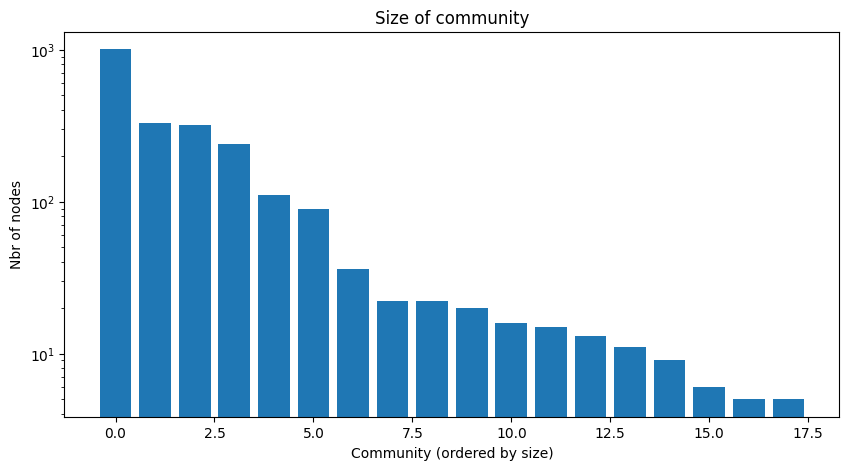

In [26]:

from networkx.algorithms import community

communities = community.greedy_modularity_communities(G)
print(f"Nbr community detected: {len(communities)}")

community_sizes = [len(c) for c in communities]
print(f"Avg size: {np.mean(community_sizes):.0f} articles")
print(f"largest: {max(community_sizes)} articles")
print(f"smallest: {min(community_sizes)} articles")


plt.figure(figsize=(10, 5))
plt.bar(range(len(community_sizes)), sorted(community_sizes, reverse=True))
plt.xlabel('Community (ordered by size)')
plt.ylabel('Nbr of nodes')
plt.title('Size of community')
plt.yscale('log')
plt.show()
